In [4]:
import pandas as pd

# Load the datasets
df_2004_5 = pd.read_csv('/content/Solar_flare_RHESSI_2004_05.csv')
df_2015_16 = pd.read_csv('/content/Solar_flare_RHESSI_2015_16.csv')

# Ensure columns are consistent
df_2004_5.columns == df_2015_16.columns  # Check if columns match

# Concatenate the datasets
df = pd.concat([df_2004_5, df_2015_16], ignore_index=True)

# Sort by date if necessary
df['dt.peak'] = pd.to_datetime(df['dt.peak'])
df = df.sort_values(by='dt.peak')


In [8]:
# Check if 'dt.peak' is already the index
if 'dt.peak' in df.columns: # Corrected the condition to check if in columns.
  # If it is in columns, set it as the index
  df.set_index('dt.peak', inplace=True)

# Resample the data
df_resampled = df.resample('D').mean(numeric_only=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['peak.c/s', 'total.counts']])


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import the numpy library with the alias 'np'

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)  # Now 'np' is defined and can be used

seq_length = 10  # Example sequence length
X, y = create_sequences(df_scaled, seq_length)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 1.5173e-04 - val_loss: 3.7605e-05
Epoch 2/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.0805e-04 - val_loss: 3.9311e-05
Epoch 3/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 3.3574e-04 - val_loss: 3.8969e-05
Epoch 4/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.2431e-04 - val_loss: 3.8455e-05
Epoch 5/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.3298e-04 - val_loss: 3.8312e-05
Epoch 6/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1.0815e-04 - val_loss: 3.7437e-05
Epoch 7/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 1.1003e-04 - val_loss: 3.7939e-05
Epoch 8/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.5752e-04 - val_loss: 3.7507e-05
Epoch 9/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 8.9000e-05 - val_loss: 3.8720e-05
Epoch 10/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 1.3435e-04 - val_loss: 3.8293e-05
Epoch 11/100
707/707 ━━━━━━━━━━

In [16]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)  # 70% train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False) # 15% val, 15% test


model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

Epoch 1/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.8887e-04 - val_loss: 6.5266e-05
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1.9954e-04 - val_loss: 6.5344e-05
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 1.4598e-04 - val_loss: 6.5127e-05
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 8.3699e-05 - val_loss: 6.5776e-05
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 9.2173e-05 - val_loss: 6.5500e-05
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 1.3112e-04 - val_loss: 7.0115e-05
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 2.4002e-04 - val_loss: 6.5806e-05
Epoch 8/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.1860e-04 - val_loss: 6.5330e-05
Epoch 9/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1.0455e-04 - val_loss: 6.5130e-05
Epoch 10/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 2.0061e-04 - val_loss: 6.6096e-05
Epoch 11/100
619/619 ━━━━━━━━━━━━━

133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step


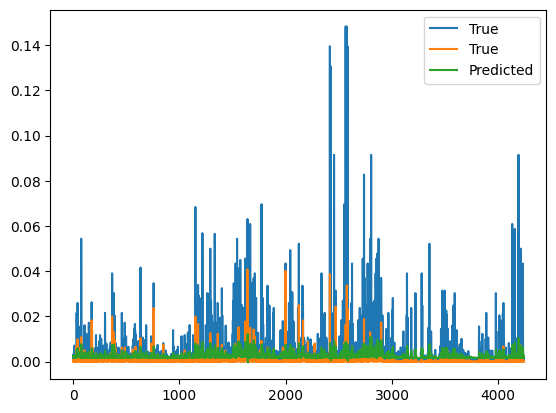

In [17]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='True')
plt.plot(model.predict(X_test), label='Predicted')
plt.legend()
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ... (Your existing code) ...

def prepare_data(future_data, timesteps, features):
    """
    Preprocesses future_data into the format expected by the model.

    Args:
        future_data: Raw data for future predictions.
        timesteps: The number of timesteps expected by the LSTM layer.
        features: The number of features expected by the LSTM layer.

    Returns:
        Processed data in the format expected by the model.
    """
    # Ensure future_data is a NumPy array
    future_data = np.array(future_data) # This line was indented incorrectly

    # Check if future_data has enough data points for at least one prediction
    if future_data.size < timesteps * features:
        raise ValueError(f"future_data has {future_data.size} elements, "
                         f"but at least {timesteps * features} are needed to make "
                         f"a single prediction with shape (1, {timesteps}, {features}). "
                         f"Please provide more data.")

    # Reshape the data to match the expected shape of the model,
    # taking only the necessary elements for one prediction
    num_predictions = future_data.size // (timesteps * features)  # Calculate how many predictions can be made
    X_future = future_data[:num_predictions * timesteps * features].reshape(num_predictions, timesteps, features)

    return X_future

# ... (Rest of your code) ...

In [37]:
!pip install tensorflow numpy scikit-learn matplotlib

In [38]:
!pip install tensorflow

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf  # Import TensorFlow directly

# Now you can access layers like this:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ... (Your existing code) ...

def prepare_data(future_data, timesteps, features):
    """
    Preprocesses future_data into the format expected by the model.

    Args:
        future_data: Raw data for future predictions.
        timesteps: The number of timesteps expected by the LSTM layer.
        features: The number of features expected by the LSTM layer.

    Returns:
        Processed data in the format expected by the model.
    """
    # Ensure future_data is a NumPy array
    future_data = np.array(future_data)

    # Check if future_data has enough data points for at least one prediction
    if future_data.size < timesteps * features:
        raise ValueError(f"future_data has {future_data.size} elements, "
                         f"but at least {timesteps * features} are needed to make "
                         f"a single prediction with shape (1, {timesteps}, {features}). "
                         f"Please provide more data.")

    # Reshape the data to match the expected shape of the model,
    # taking only the necessary elements for one prediction
    num_predictions = future_data.size // (timesteps * features)  # Calculate how many predictions can be made
    X_future = future_data[:num_predictions * timesteps * features].reshape(num_predictions, timesteps, features)

    # Check the shape of your LSTM layer
    # You might need to adjust 'features' based on your model definition
    # For example, if your LSTM layer was defined as:
    # model.add(LSTM(units=50, input_shape=(timesteps, num_features)))
    # Then 'features' should be equal to num_features

    # Assuming your LSTM layer expects 2 features, select the correct columns:
    X_future = X_future[:, :, :2] # Select the first 2 features

    return X_future

# ... (Rest of your code) ...

In [58]:
!pip install opencv-python matplotlib


TypeError: Image data of dtype object cannot be converted to float

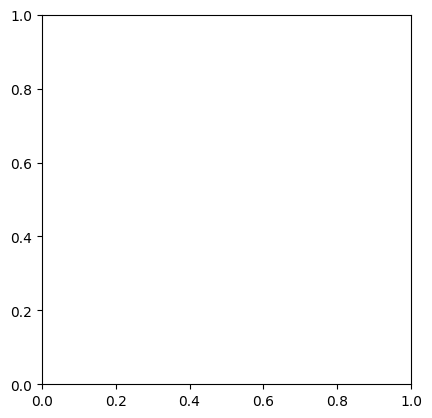

In [63]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('PredictionGrapf.png') # Replace with the actual path
plt.imshow(img) # Display the image to check
plt.show()

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_true, y_pred, and time_index are your data
# Example data creation
time_index = pd.date_range(start='2025-01-01', periods=len(y_true), freq='D')  # Adjust based on your data
y_true = [...]  # Actual solar flare intensities
y_pred = [...]  # Predicted solar flare intensities

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Time': time_index,
    'True': y_true,
    'Predicted': y_pred
})

# Define a threshold for significant events
threshold = 0.02  # Adjust based on your specific requirements

# Create the plot
plt.figure(figsize=(14, 7))

# Plot true and predicted values
plt.plot(df['Time'], df['True'], label='True Solar Flare Intensity', color='blue', alpha=0.6)
plt.plot(df['Time'], df['Predicted'], label='Predicted Solar Flare Intensity', color='orange', alpha=0.6)

# Highlight significant predicted events
significant_events = df[df['Predicted'] > threshold]
plt.scatter(significant_events['Time'], significant_events['Predicted'], color='red', label='Significant Predicted Events', s=100, edgecolor='black')

# Adding titles and labels
plt.title('Solar Flare Intensity: Actual vs. Predicted', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'y_true' is not defined